# POKÉMON ANALITYCS



In [1]:
import pandas as pd 

In [2]:
#Reading the CSV file and displaying its first rows
df = pd.read_csv('datasets/pokemon.csv')
df.head(5)

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [3]:
#Checking the types of each column
df.dtypes

number         int64
name          object
type1         object
type2         object
total          int64
hp             int64
attack         int64
defense        int64
sp_attack      int64
sp_defense     int64
speed          int64
generation     int64
legendary       bool
dtype: object

In [4]:
#Provide an overview of the dataset, including data types, non-null counts, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       574 non-null    object
 4   total       1072 non-null   int64 
 5   hp          1072 non-null   int64 
 6   attack      1072 non-null   int64 
 7   defense     1072 non-null   int64 
 8   sp_attack   1072 non-null   int64 
 9   sp_defense  1072 non-null   int64 
 10  speed       1072 non-null   int64 
 11  generation  1072 non-null   int64 
 12  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB


In [5]:
#Checking the number of empty attributes per column
df.isna().sum()

number          0
name            0
type1           0
type2         498
total           0
hp              0
attack          0
defense         0
sp_attack       0
sp_defense      0
speed           0
generation      0
legendary       0
dtype: int64

> **Note:** The majority of empty values are found in the 'Type2' column. This is because, in many cases, a Pokémon does not possess a secondary type.


In [6]:
#Replace empty values (None) in the 'type2' column with the string 'None'
df['type2'].fillna('None', inplace=True)

This action is performed to make the data in the 'Type2' column more consistent and readable. The 'None' values indicate that a Pokémon does not have a secondary type. This simplifies data interpretation and prevents ambiguities, as empty values can be confused with missing or unknown information.

In [7]:
#Checking the number of duplicated instances
df.duplicated().sum()


0

In [8]:
#Checking the unique values in the 'Type1' column
df.type1.unique()

array(['Grass', 'Fire', 'Water', 'Blastoise', 'Bug', 'Normal', 'Dark',
       'Poison', 'Electric', 'Ground', 'Ice', 'Fairy', 'Steel',
       'Fighting', 'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying',
       'Graass'], dtype=object)

> **Note:** The unique values in the 'Type1' column include 'Blastoise' and 'Graass,' which appear to be typos and not valid Pokémon types.

In [9]:
#Counting and displaying the frequency of each Pokémon type in the 'type1' to verify if any typing errors are repeated in multiple rows
df.type1.value_counts()

type1
Water        136
Normal       117
Grass         94
Bug           83
Psychic       80
Fire          67
Electric      63
Rock          60
Dark          48
Fighting      45
Ghost         43
Poison        42
Ground        42
Dragon        41
Steel         39
Ice           38
Fairy         23
Flying         9
Blastoise      1
Graass         1
Name: count, dtype: int64

In [10]:
#The same to 'type2' column
df.type2.value_counts()

type2
None        498
Flying      114
Fairy        44
Psychic      43
Poison       41
Ground       39
Steel        36
Dragon       35
Fighting     32
Grass        29
Dark         28
Ghost        26
Water        22
Ice          19
Fire         18
Rock         16
Normal       11
Electric     11
Bug          10
Name: count, dtype: int64

Fortunately, the values do not repeat for the 'type2' column. However, we need to correct these errors in the 'type1' column.

In [11]:
#Identifying the instance where 'Blastoise' is found in the 'type1' column, allowing us to locate and correct the error in the dataset.
error_instance_blastoise = df[df['type1'] == 'Blastoise']
error_instance_blastoise

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
15,9,Gigantamax Blasoise,Blastoise,Water,530,79,83,100,85,105,78,1,False


In [12]:
#Correcting values in the 'name', 'type1', and 'type2' columns
df.loc[error_instance_blastoise.index, 'name'] = 'Gigantamax Blastoise'
df.loc[error_instance_blastoise.index, 'type1'] = 'Water'
df.loc[error_instance_blastoise.index, 'type2'] = 'None'

In [13]:
#Displaying the instance after the corrections
df[df['name'] == 'Gigantamax Blastoise']

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
15,9,Gigantamax Blastoise,Water,None,530,79,83,100,85,105,78,1,False


In [14]:
#Identifying the instance error where 'Graass' is found in the 'type1' column
error_instance_graass = df[df['type1'] == 'Graass']
error_instance_graass

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
978,830,Eldegoss,Graass,None,460,60,50,90,80,120,60,8,False


In [15]:
#Correcting the values
df.loc[error_instance_graass.index, 'type1'] = 'Grass'

In [16]:
#Displaying the instance after the corrections
df[df['name'] == 'Eldegoss']

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
978,830,Eldegoss,Grass,None,460,60,50,90,80,120,60,8,False


In [17]:
#Now, all instances in 'type1' and 'type2' columns have been corrected. Displaying the types again
df.type1.value_counts()

type1
Water       137
Normal      117
Grass        95
Bug          83
Psychic      80
Fire         67
Electric     63
Rock         60
Dark         48
Fighting     45
Ghost        43
Poison       42
Ground       42
Dragon       41
Steel        39
Ice          38
Fairy        23
Flying        9
Name: count, dtype: int64

In [18]:
#Generate basic statistics for numerical columns, providing insights into the data distribution and central tendencies.
df.describe()

,number,total,hp,attack,defense,sp_attack,sp_defense,speed,generation
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,445.219216,440.885261,70.486940,80.938433,74.968284,73.273321,72.476679,68.792910,4.294776
std,267.772806,121.379077,26.868039,32.463582,31.208059,32.643119,27.934253,30.076281,2.346472
min,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000
25%,209.750000,330.000000,50.000000,56.000000,52.000000,50.000000,50.000000,45.000000,2.000000
50%,442.500000,460.500000,68.000000,80.000000,70.000000,65.000000,70.000000,65.000000,4.000000
75%,681.250000,519.250000,84.000000,100.000000,90.000000,95.000000,90.000000,90.000000,6.000000
max,898.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,8.000000


With the data preprocessing phase now behind us, we embark upon the crucial phase of initial exploratory analysis. 

This stage serves as the cornerstone of our data journey, where we seek to unearth hidden insights, patterns, and nuances within the dataset.


In [19]:
#Importing matplotlib to enable data visualization capabilities.
import matplotlib.pyplot as plt 

In [20]:
#Calculating the count of Pokémon types. 
#This step helps us understand the distribution of Pokémon types in the dataset.
type_counts = df['type1'].value_counts()

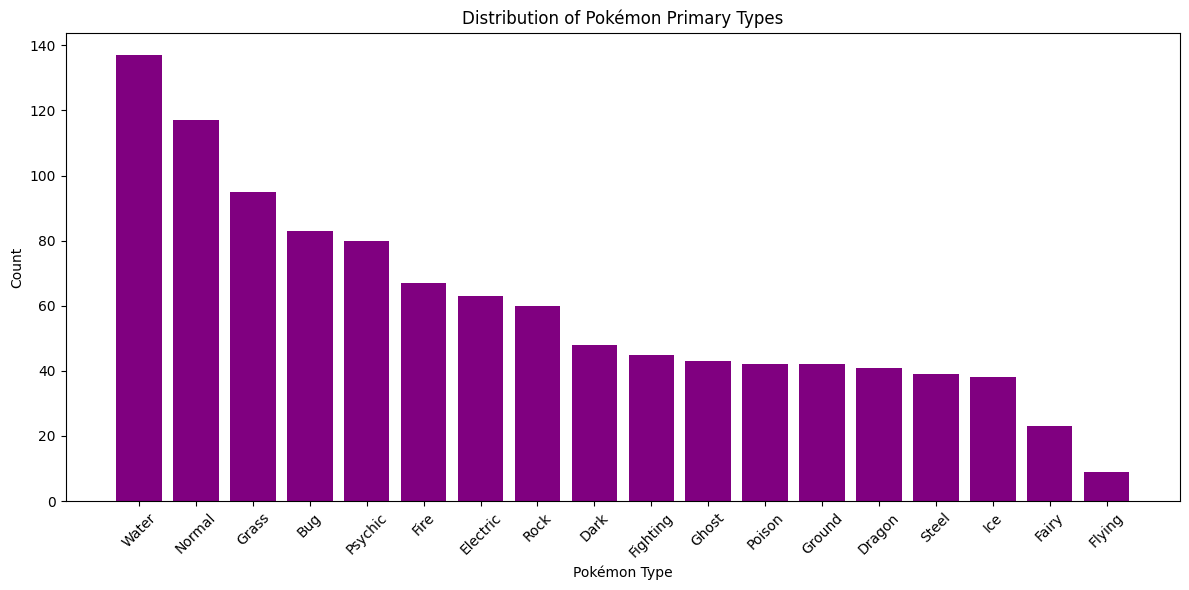

In [21]:
#Performing a graphical visualization of the primary types of Pokémon present in the dataset

# Plot settings
plt.figure(figsize=(12, 6))  # Figure size
plt.bar(type_counts.index, type_counts.values, color='purple')

# Labels and title
plt.xlabel('Pokémon Type')
plt.ylabel('Count')
plt.title('Distribution of Pokémon Primary Types')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()  # Adjust layout to prevent label clipping
plt.show()


In [22]:
#Filtering out secondary types that are 'None' to obtain valid secondary subtypes for each Pokémon
filtered_df = df[df['type2'] != 'None']

In [23]:
#Calculating the count of Pokémon secondary types.
type2_counts = filtered_df['type2'].value_counts()

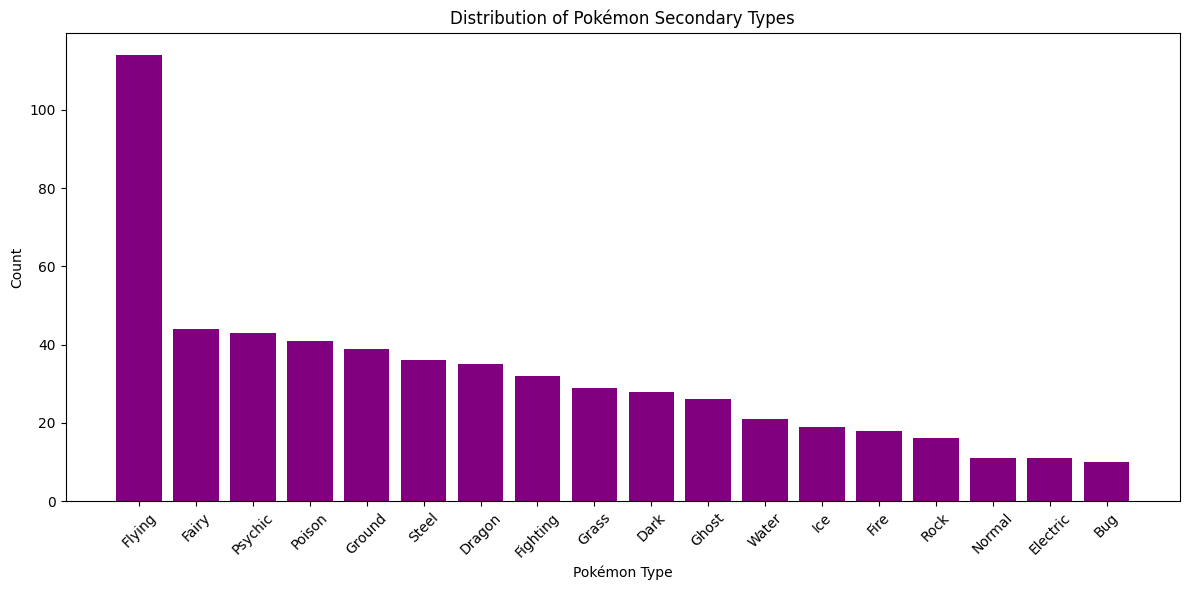

In [24]:
#Performing a graphical visualization of the secondary types of Pokémon present in the dataset

# Plot settings
plt.figure(figsize=(12, 6))  # Figure size
plt.bar(type2_counts.index, type2_counts.values, color='purple')


# Labels and title
plt.xlabel('Pokémon Type')
plt.ylabel('Count')
plt.title('Distribution of Pokémon Secondary Types')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()  # Adjust layout to prevent label clipping
plt.show()

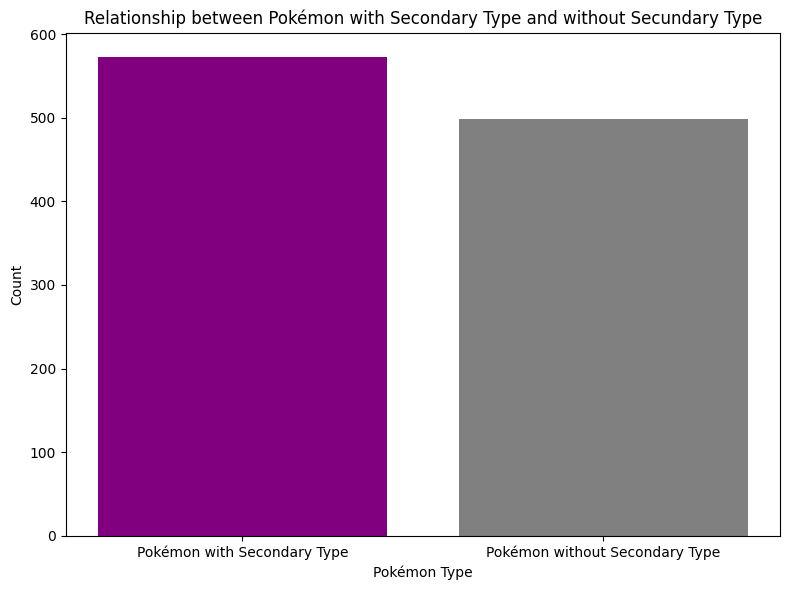

In [25]:
# Count Pokémon with valid secondary type (excluding 'None')
valid_secondary_count = len(df[df['type2'] != 'None'])

# Count Pokémon with secondary type as 'None'
none_secondary_count = len(df[df['type2'] == 'None'])

# Labels and values for the chart
labels = ['Pokémon with Secondary Type', 'Pokémon without Secondary Type']
counts = [valid_secondary_count, none_secondary_count]

# Colors for the bars
colors = ['purple', 'gray']

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=colors)

# Labels and title
plt.xlabel('Pokémon Type')
plt.ylabel('Count')
plt.title('Relationship between Pokémon with Secondary Type and without Secundary Type')

# Display the chart
plt.tight_layout()
plt.show()

### Pokémon Type Analysis

In our initial exploration of Pokémon data, we've uncovered some intriguing insights into the distribution of Pokémon types, both primary and secondary. Let's take a closer look at what we've discovered:

#### Primary Pokémon Types

* **Water Dominance**: It's clear that 'Water' is the dominant primary type among Pokémon, boasting the highest count and prevalence. This suggests that water-based Pokémon are quite abundant in the Pokémon world.

* **Flying Rarity**: On the other end of the spectrum, the 'Flying' type stands out as the least common primary type. This rarity may indicate that not many Pokémon are primarily associated with flying abilities.

#### Secondary Pokémon Types

* **Surprising 'Flying' Prevalence**: Interestingly, while 'Flying' is a rare primary type, it's remarkably common as a secondary type among Pokémon. This raises questions about the prevalence of flying abilities among Pokémon, even when it's not their primary focus.

#### The Relationship Between Pokémons with Secondary Types and Pokémons withouth Secundary Types

* **Balanced Secondary Types**: The relationship between Pokémon with secondary types and those without secondary types is surprisingly balanced. This equilibrium suggests that a significant portion of Pokémon possess a secondary type, adding depth to their character.

These observations provide valuable insights into the diverse world of Pokémon types and hint at intriguing aspects of their abilities and characteristics. Further analysis and exploration may unveil more secrets about the Pokémon universe.


## What Do the Pokémon Generations Conceal?

In [26]:
pokemon_color_mapping = {
    'Normal': 'silver',
    'Fire': 'orange',
    'Water': 'blue',
    'Electric': 'yellow',
    'Grass': 'lightgreen',
    'Ice': 'lightblue',
    'Fighting': 'red',
    'Poison': 'purple',
    'Ground': 'brown',
    'Flying': 'skyblue',
    'Psychic': 'magenta',
    'Bug': 'green',
    'Rock': 'sienna',
    'Ghost': 'darkviolet',
    'Dragon': 'darkred',
    'Dark': 'black',
    'Steel': 'gray',
    'Fairy': 'pink'
}

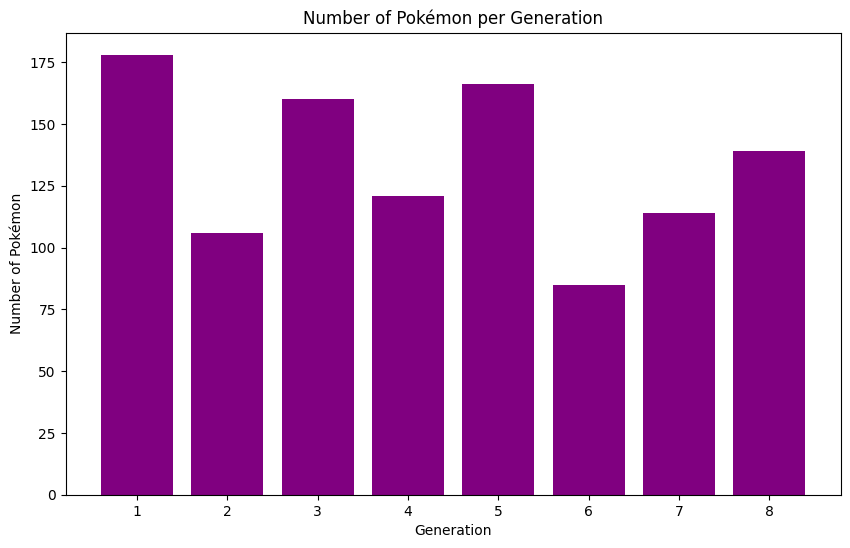

In [29]:
df_filtered = df[df['generation'] >= 1]

# Count Pokémon per generation
generation_count = df_filtered['generation'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(10, 6))  # Figure size
plt.bar(generation_count.index, generation_count.values, color='purple')

# Add labels and title
plt.xlabel('Generation')
plt.ylabel('Number of Pokémon')
plt.title('Number of Pokémon per Generation')

# Show the chart
plt.show()

> **Important Note:**
>
> The current chart includes Pokémon and their variations, such as Pokémon Mega Evolutions and Gigantamax forms. However, it's essential to note that this chart does not accurately reflect the number of Pokémon per generation.
>
> For a more concise and accurate analysis of Pokémon generations, it is necessary to remove these variations and consider only the base forms. This will allow us to visualize the distribution of Pokémon more clearly and identify specific trends within each generation.
>
> Variations like Mega Evolutions and Gigantamax forms can be analyzed separately at a later stage, enabling a more comprehensive understanding of the Pokémon world. However, for an initial view of the generations, it is advisable to focus solely on the base forms.


In [43]:
#List of variations to exclude
variations_to_exclude = ['Mega', 'Gigantamax']

#Function to check if a Pokémon name contains variations to be excluded
def has_variations(name):
    for variation in variations_to_exclude:
        if variation in name:
            return True
    return False

#Filter Pokémon with names that do not contain excluded variations
filtered_pokemon = df[~df['name'].apply(has_variations)]

#Creating a CSV file to store these Pokémon (for possible future analysis)
filtered_pokemon.to_csv('datasets/pokemon_without_variations.csv', index=False)

#Checking the new CSV with filtered Pokémon
filtered_pokemon.head(5)


,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
5,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
6,5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False


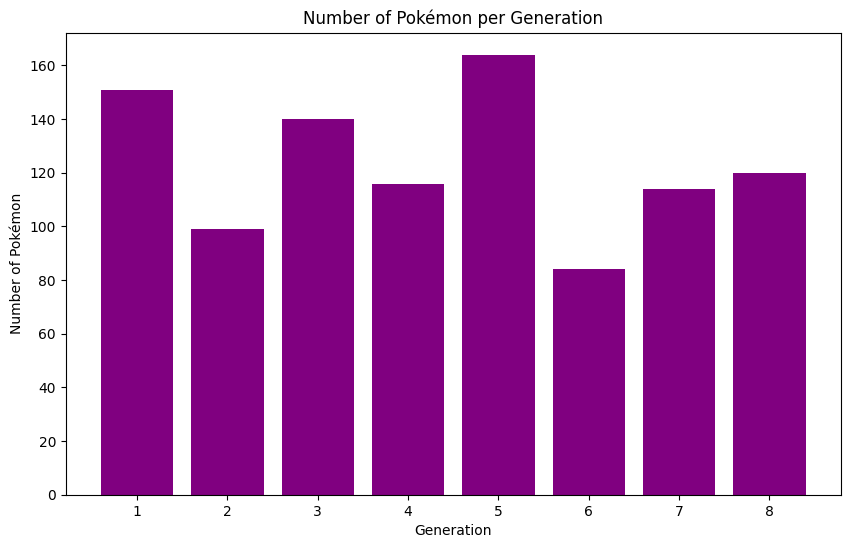

In [44]:
generations = filtered_pokemon[filtered_pokemon['generation'] >= 1]

# Count Pokémon per generation
filtred_generation_count = generations['generation'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(10, 6))  # Figure size
plt.bar(filtred_generation_count.index, filtred_generation_count.values, color='purple')

# Add labels and title
plt.xlabel('Generation')
plt.ylabel('Number of Pokémon')
plt.title('Number of Pokémon per Generation')

# Show the chart
plt.show()